In [1]:
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv("../../../ml-basico/CURSO_IA_ML/Aula 2/housing.csv")
dataset.head()
# dataset.info()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

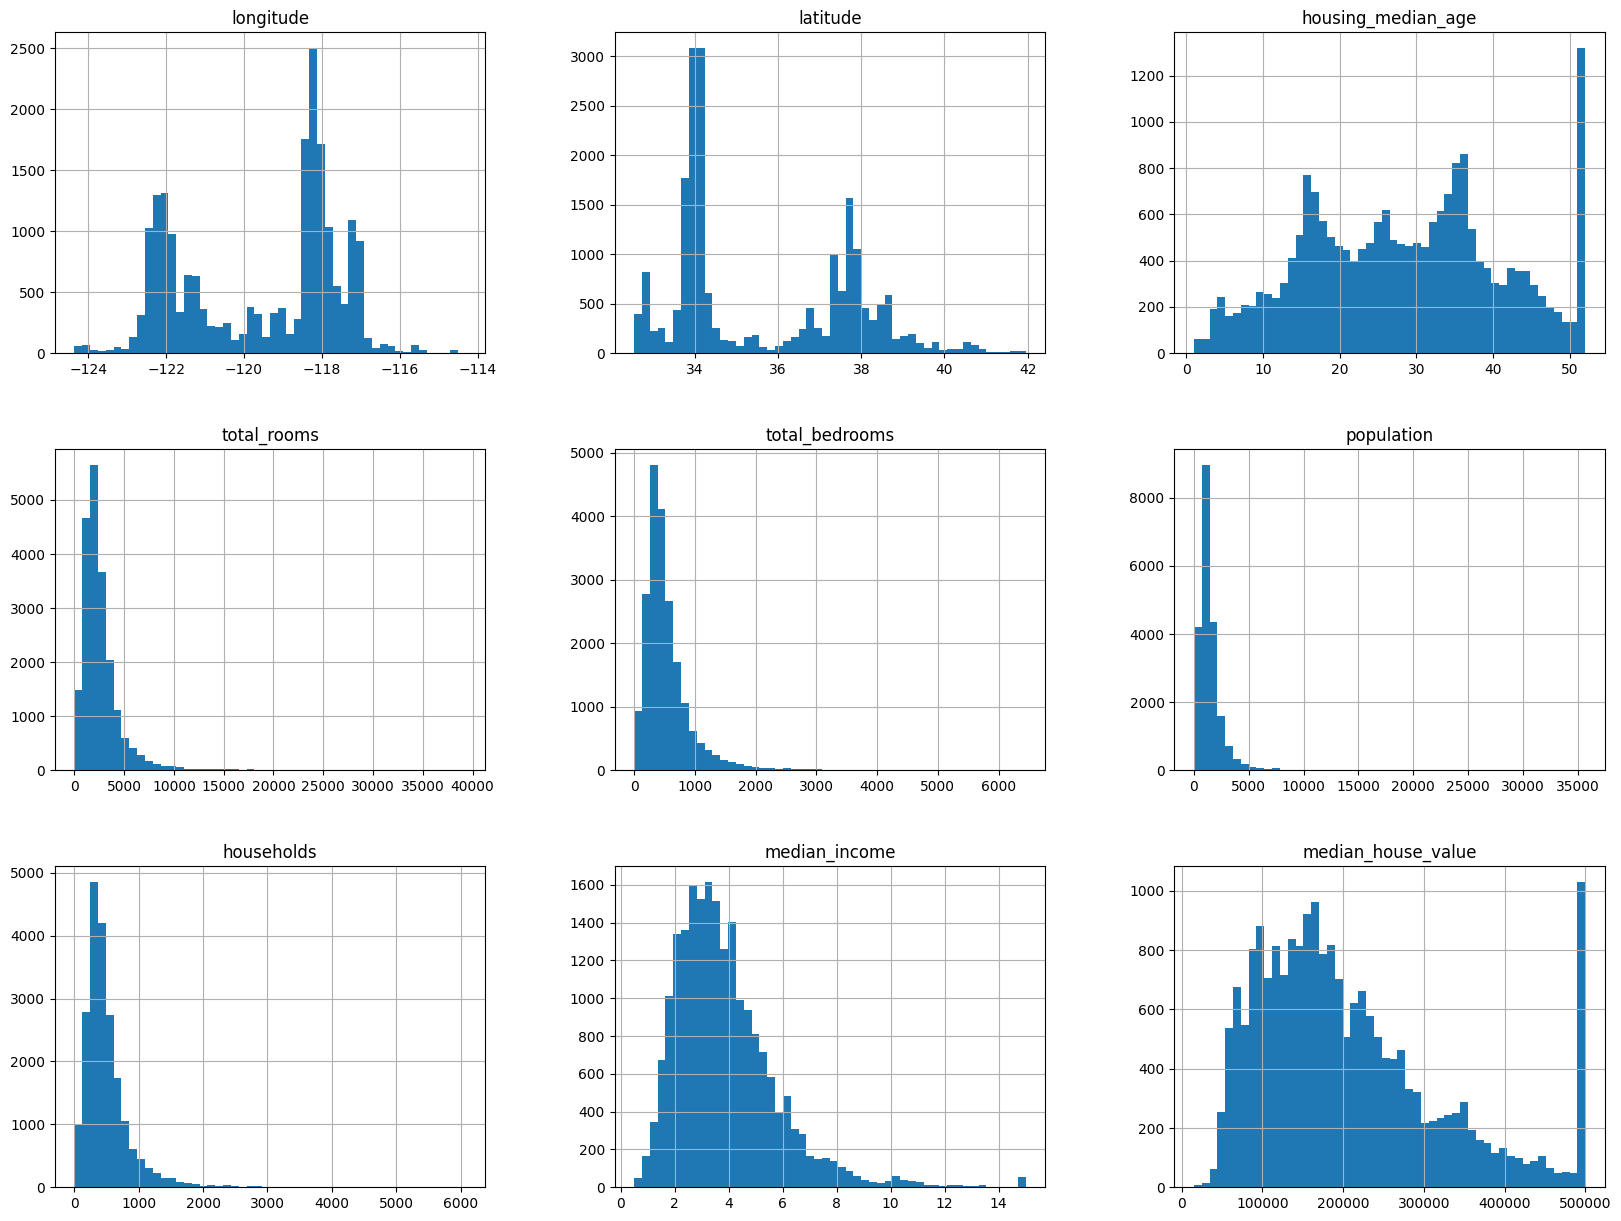

In [2]:
dataset.hist(bins=50, figsize=(20,15))

# Começando o Modelo

## Antes de começar. Como definir nossa variável TARGET?

Qual nosso objetivo? Descobrir quanto uma casa custará, ou seja, nosso target é "median_house_value"

Para classificar as linhas com base na target poderiamos usar:
- K-means
- Sturges
- IQR

Neste caso mais simples vamos usar STURGES que acaba criando 16 classes por conta do "median_income".

Há um exemplo também com IQR, mas gera muitas classes por causa da dispersão dos dados.

Haverá um exemplo de K-means em outro arquivo somente para ele. Que realmente seria o ideal!

<Axes: >

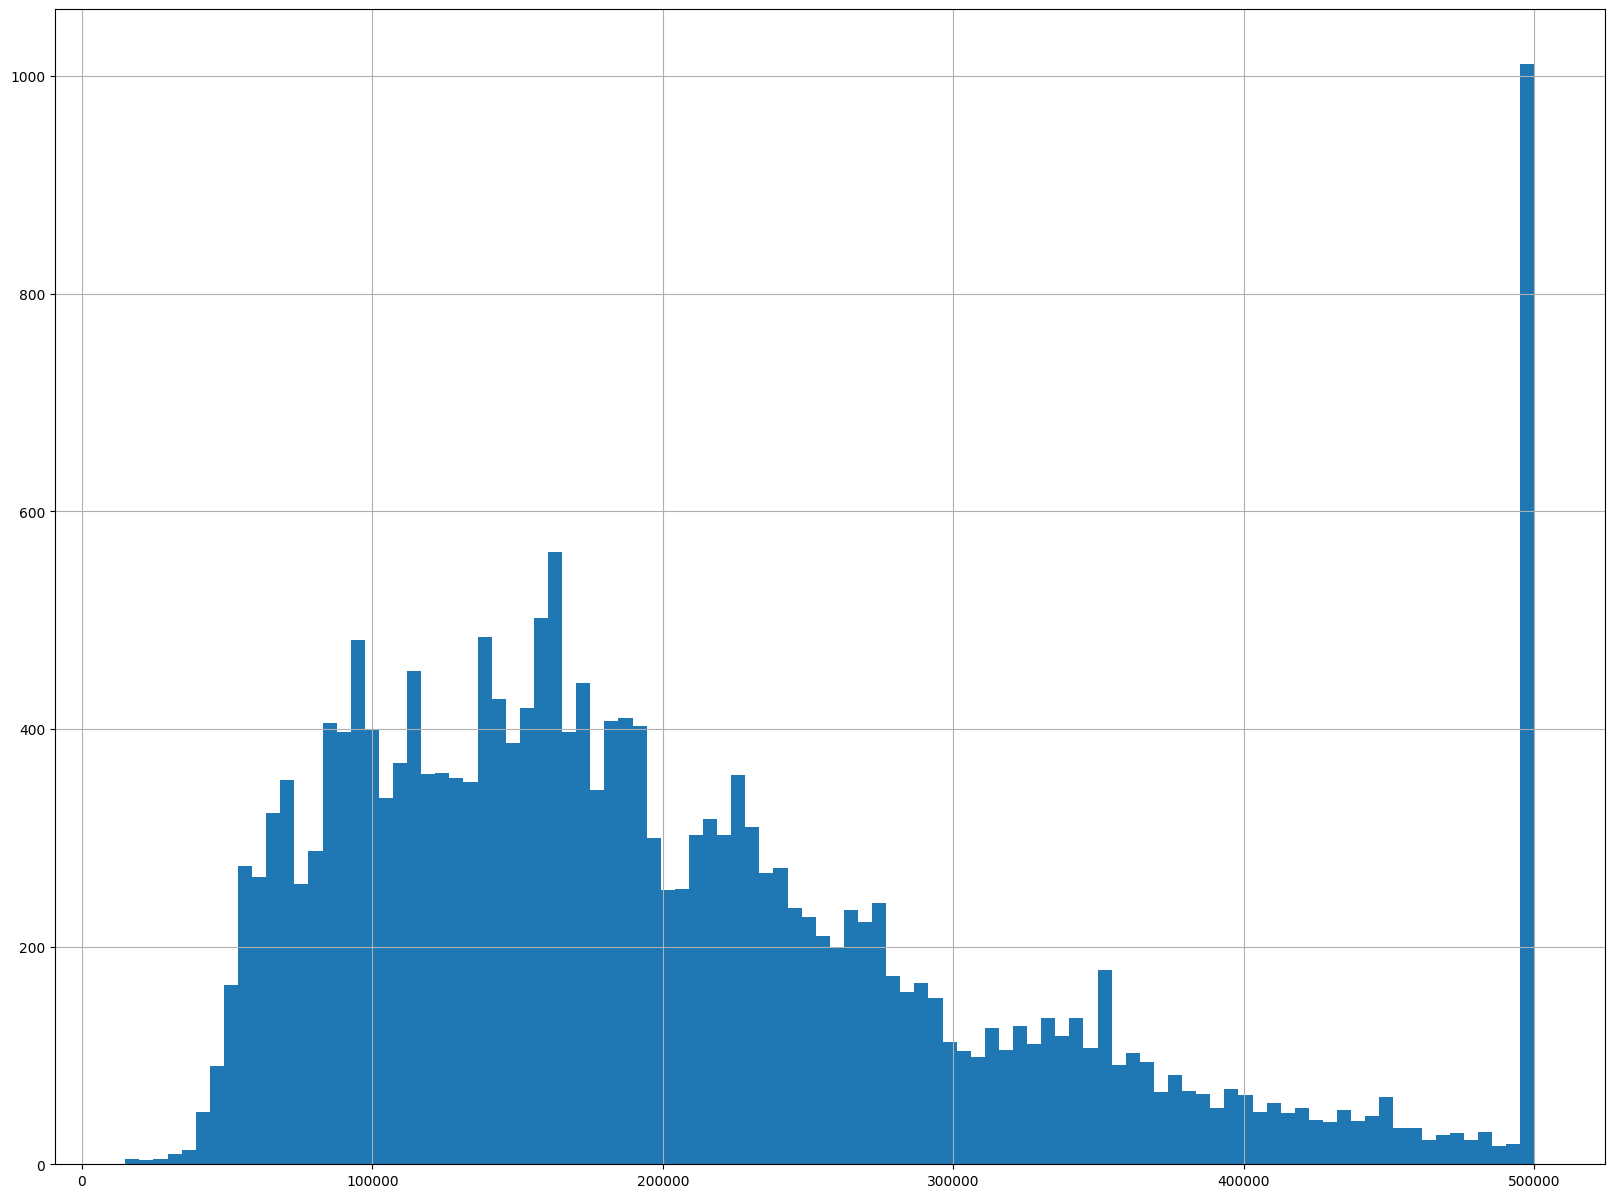

In [3]:
target = "median_house_value"
dataset[target].hist(bins=100, figsize=(20,15))

Para definir a quantidade de classes

In [4]:
# Sturges - Criando BINS (classes)
import numpy as np
n = len(dataset[target])
bins = int(np.ceil(np.log2(n) + 1))
method = 'STURGES'

In [4]:
# Freedman–Diaconis Rule (IQR)- Criando BINS (classes)
# from scipy.stats import iqr
# import numpy as np
# data = dataset["median_house_value"]
#
# bin_width = 2 * iqr(data) / len(data)**(1/3)
# bins = int(np.ceil((data.max() - data.min()) / bin_width))
# method = 'IQR'

Número ideal de classes (Sturges) para median_house_value é 46


In [5]:
print(f"Número ideal de classes {method} para {target} é {bins}")

Número ideal de classes STURGES para median_house_value é 16


In [6]:
# Criando os bins (classes)
# Labels personalizados iniciando em 1

labels = list(range(1, bins + 1))  # Ex: [1, 2, 3, ..., k]
dataset['target_class'] = pd.cut(dataset[target], bins=bins, labels=labels)

<Axes: >

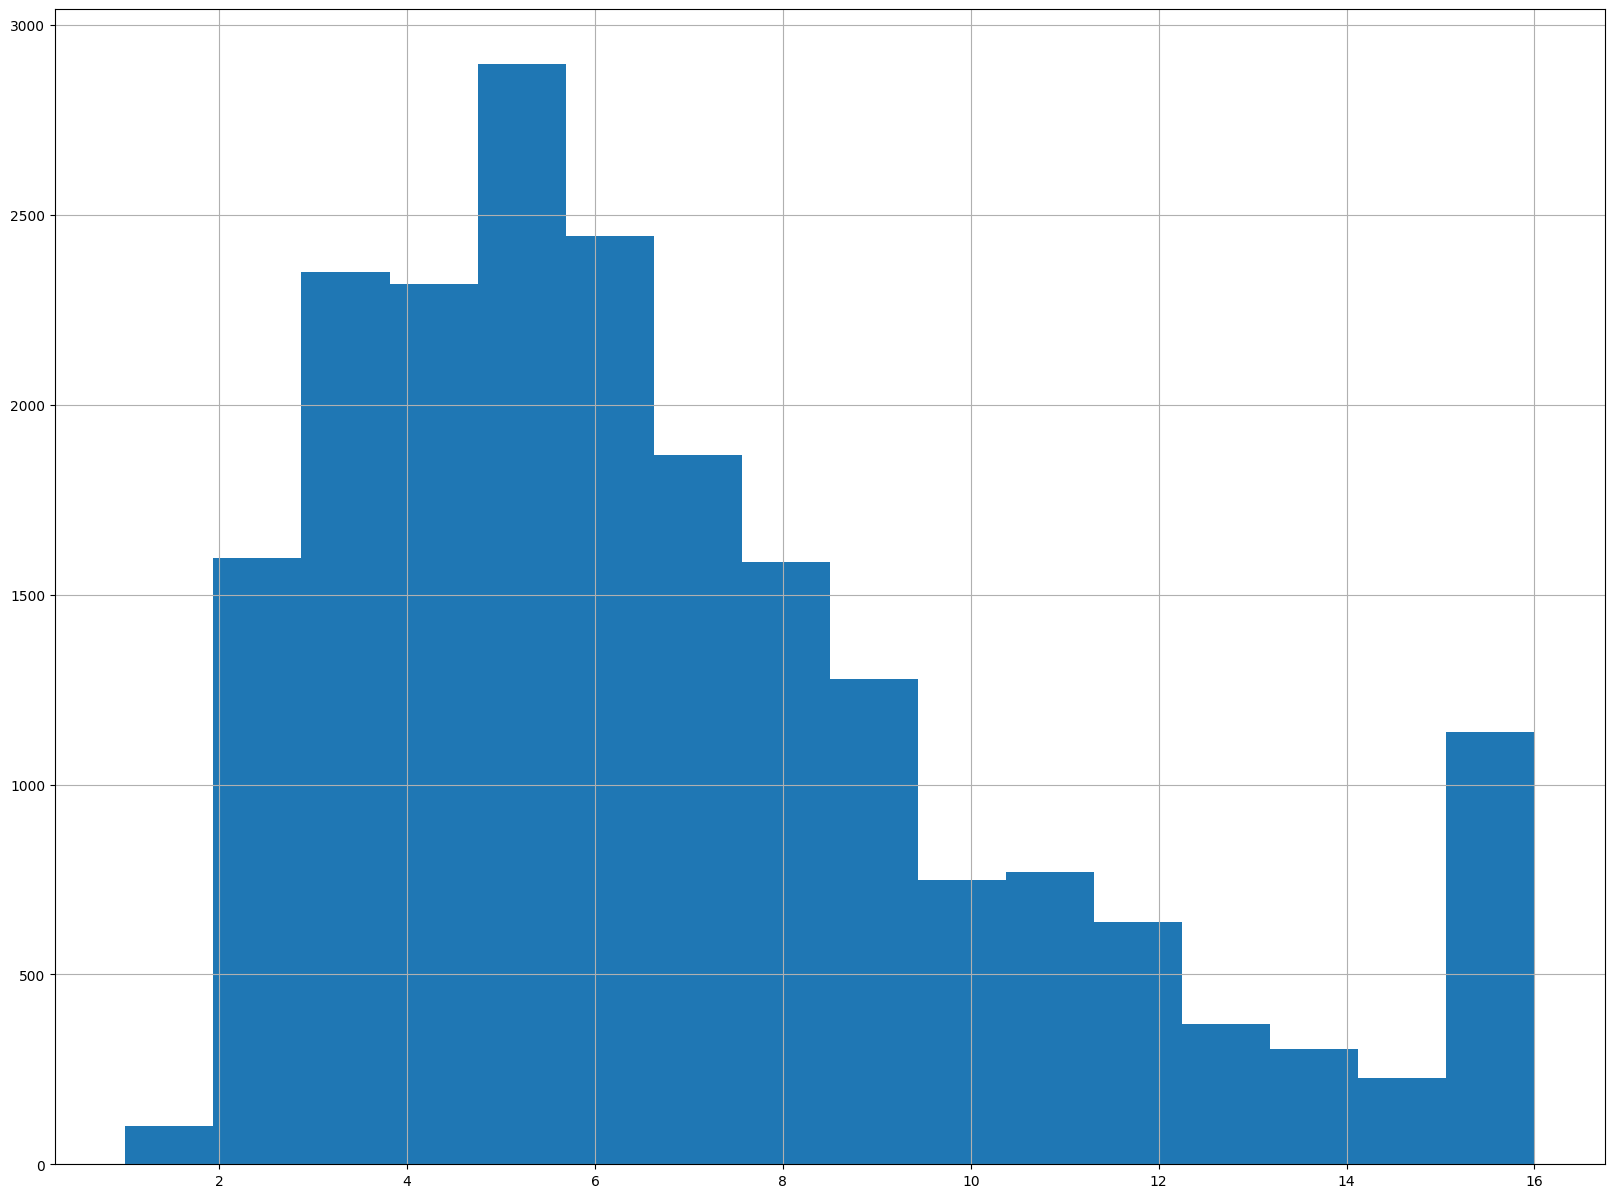

In [7]:
dataset["target_class"].hist(bins=bins, figsize=(20,15))

🧪 2. Divisão da base de dados
Usar quando: vai separar em treino/teste, mantendo proporções das classes.

Ou seja, se temos 5 classes (target_class) no dataset, o percentual deve se manter o mesmo na base real, treino e teste. se tem 35% na classe 2 na base real. é preciso ter os mesmos 35% na base de teste e treino também

- train_test_split → separação aleatória simples
- **StratifiedShuffleSplit** → separação estratificada (mantém a proporção das classes)
- KFold, StratifiedKFold → para validação cruzada

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_train_set: pd.DataFrame = pd.DataFrame()
strat_test_set: pd.DataFrame = pd.DataFrame()

splitter = StratifiedShuffleSplit(
    # qtde de splits - treino e teste pode ser apenas 1, mas podemos fazer mais splits
    n_splits=1,
    test_size=0.2,
    random_state=42 # seed
)

split_data = splitter.split(
    dataset,
    dataset["target_class"], # TARGET!
)

for train_index, test_index in split_data:
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

In [9]:
strat_train_set.head()
# strat_train_set.info()
# if not strat_test_set.empty:
# strat_train_set['target_class'].value_counts()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,target_class
3560,-118.59,34.25,15.0,9716.0,2387.0,4992.0,2225.0,3.6231,193300.0,<1H OCEAN,6
13686,-117.21,34.14,16.0,1613.0,245.0,811.0,267.0,5.2591,140700.0,INLAND,5
9187,-118.61,34.38,2.0,5989.0,883.0,1787.0,613.0,6.6916,329500.0,INLAND,11
11990,-117.53,33.97,34.0,1293.0,215.0,774.0,217.0,3.8906,141000.0,INLAND,5
7143,-118.13,34.02,40.0,2988.0,690.0,2144.0,667.0,2.3359,189300.0,<1H OCEAN,6


# Visualizando os Dados!


EOK! Este é o estado da Caifornia 🏖 Vamos visualizar as concentrações de pontos?

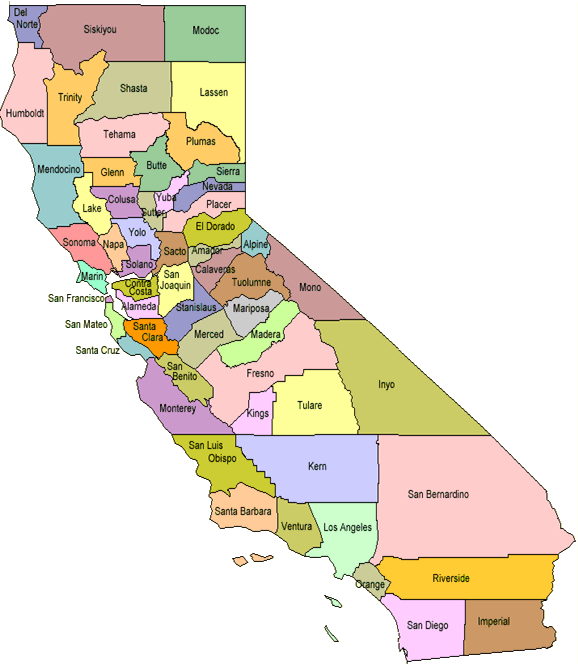

<Axes: xlabel='longitude', ylabel='latitude'>

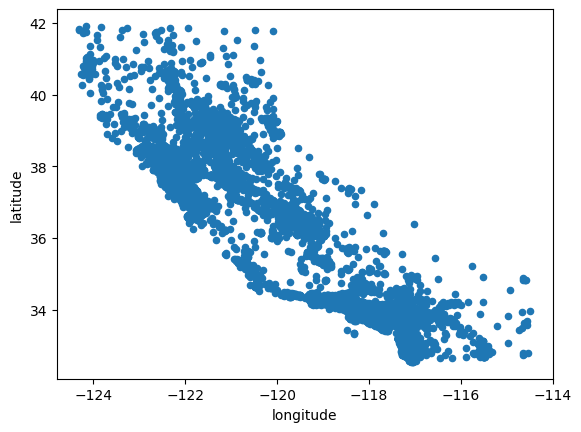

In [10]:
strat_train_set.plot(kind="scatter", x="longitude", y="latitude")

Com alpha=0.1, os pontos individuais são mais claros, mas onde muitos pontos se sobrepõem, a cor se intensifica. Isso permite que você visualize facilmente as regiões de alta densidade

<Axes: xlabel='longitude', ylabel='latitude'>

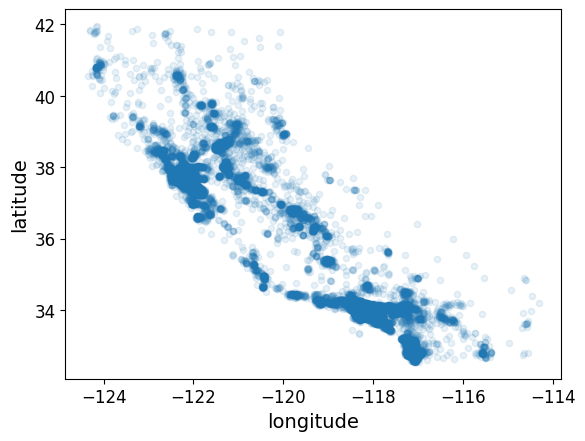

In [42]:

strat_train_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

## Agora, vendo por preço!

In [11]:
selected_dataset = strat_train_set

<Axes: xlabel='longitude', ylabel='latitude'>

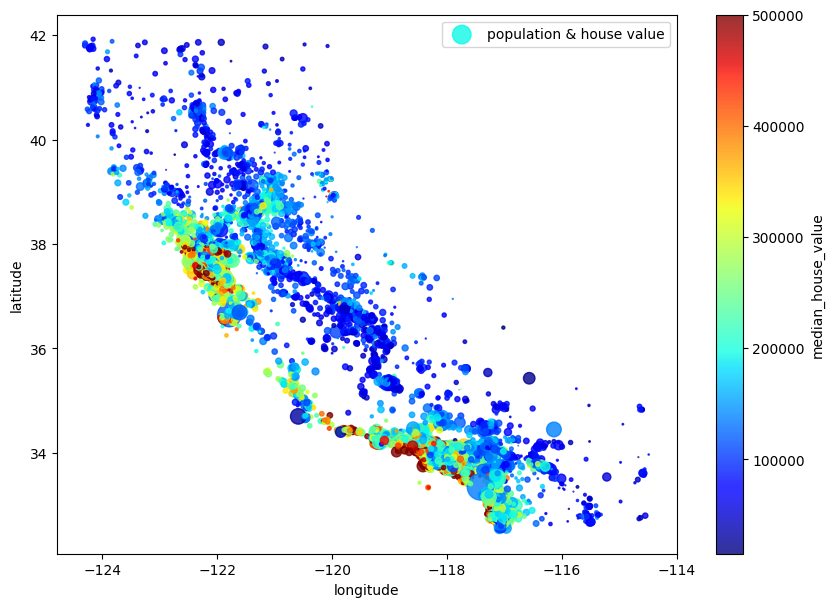

In [12]:
selected_dataset.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    # s = size | tamanho dos pontos conforme a população | dividir por 100 para reduzir a escala
    s=selected_dataset["population"]/100,
    # c = color - Os pontos serão coloridos de acordo com o valor dessa coluna
    c="median_house_value",
    colorbar=True, # indica que deve exibir a barra de cores na lateral
    cmap=plt.get_cmap("jet"), # define qual esquema de cores deve ser usado por C
    alpha=0.8,
    label="population & house value",
    figsize=(10,7), # tamanho do gráfica em polegadas
)

# Regressão Linear Múltipla - Buscando correlações 🔎

Primeiro, correlation só funciona com dados numéricos. Então precisamos converter colunas categóricas para colunas numéricas

## 🔧  Converter os dados MANUALMENTE (apenas pandas)

- Extrair as colunas categoricas
- Converter para numéricos
- Criar um novo dataframe

In [13]:
# Remover as colunas categóricas
selected_dataset_values = selected_dataset.drop("ocean_proximity", axis=1, inplace=False)

# criar um dataframe somente com as colunas categoricas
cat_ocean_prox = selected_dataset[["ocean_proximity"]] # duplo colchete retorna um DATAFRAME
target_labels = selected_dataset["target_class"].copy()

selected_dataset_values.drop("target_class", axis=1, inplace=True)

### OneHotEncoder
- Variáveis categóricas precisam ser convertidas para números, mas, cuidado!

Precisamos converter as CATEGORIAS para COLUNAS, marcando com binario (OneHotEncoder), pois se definirmos as categorias com números sequenciais (LabelEncoder ou OrdinalEncoder) (1,2,3,4) pode afetar o algorítimo de previsão, pois vai considerar valores maiores como mais importantes

In [14]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(cat_ocean_prox)
# encoder.get_feature_names_out()
# encoder.get_feature_names_out(['ocean_proximity'])
# print(encoded)


In [81]:
# print(encoded)
# encoder.get_feature_names_out(['ocean_proximity'])

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [15]:
# converter o array ENCODED para um dataframe, com as novas colunas seguindo a mesma indexação do DataFrame original
df_encoded = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(['ocean_proximity']),
    index=selected_dataset_values.index, # Essencial para o merge funcionar!
)

df_encoded.head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
3560,1.0,0.0,0.0,0.0,0.0
13686,0.0,1.0,0.0,0.0,0.0
9187,0.0,1.0,0.0,0.0,0.0
11990,0.0,1.0,0.0,0.0,0.0
7143,1.0,0.0,0.0,0.0,0.0


In [16]:
# mesclar os DataFrames
df_final = pd.concat([selected_dataset_values, df_encoded], axis=1)
df_final.head()
# df_final.info()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
3560,-118.59,34.25,15.0,9716.0,2387.0,4992.0,2225.0,3.6231,193300.0,1.0,0.0,0.0,0.0,0.0
13686,-117.21,34.14,16.0,1613.0,245.0,811.0,267.0,5.2591,140700.0,0.0,1.0,0.0,0.0,0.0
9187,-118.61,34.38,2.0,5989.0,883.0,1787.0,613.0,6.6916,329500.0,0.0,1.0,0.0,0.0,0.0
11990,-117.53,33.97,34.0,1293.0,215.0,774.0,217.0,3.8906,141000.0,0.0,1.0,0.0,0.0,0.0
7143,-118.13,34.02,40.0,2988.0,690.0,2144.0,667.0,2.3359,189300.0,1.0,0.0,0.0,0.0,0.0


In [68]:
# print(housing_cat_1hot)
# housing_cat_1hot.head()
# selected_dataset.head()
# cat_ocean_prox

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [17]:
corr_matrix = df_final.corr()
corr_matrix['total_rooms'].sort_values(ascending=False)
# corr_matrix['ocean_proximity_NEAR OCEAN'].sort_values(ascending=False)

total_rooms                   1.000000
total_bedrooms                0.930653
households                    0.918879
population                    0.853046
median_income                 0.199506
median_house_value            0.135838
longitude                     0.044206
ocean_proximity_INLAND        0.018197
ocean_proximity_<1H OCEAN     0.001253
ocean_proximity_NEAR OCEAN   -0.007487
ocean_proximity_ISLAND       -0.007735
ocean_proximity_NEAR BAY     -0.020581
latitude                     -0.037310
housing_median_age           -0.358678
Name: total_rooms, dtype: float64

# Tratar dados NULOS

- encontrar os nulos e preencher com a mediana (median)

In [18]:
# contagem de quantos nulls existem em cada coluna - aqui só deveria existir do total_bedrooms
df_final.isnull().sum()

# Linhas que têm pelo menos um valor NaN.
# df_final[df_final.isnull().any(axis=1)]

# Colunas que têm pelo menos um valor NaN.
# df_final.columns[df_final.isnull().any()]

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                171
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64

## Preencher usando pandas (maneira mais "manual")

Podemos pegar o nome das colunas que contém null e preencher diretamente no dataframe, pra isso, precisamos fazer algumas linhas de código

In [19]:
# Pegar os nomes das colunas e converter para array de string
null_cols = df_final.columns[df_final.isnull().any()].tolist()
print(null_cols)

['total_bedrooms']


In [20]:
def fillNaMedian(df: pd.DataFrame, col_name: str):
    median = df[col_name].median()
    df[col_name] = df[col_name].fillna(median)
    # df[col_name].fillna(median, inplace=True)

In [ ]:
# TODO - Criar um LOOP em "null_cols" chamanda a fillNa(df, colName)

In [21]:
fillNaMedian(df_final, "total_bedrooms")
df_final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
3560,-118.59,34.25,15.0,9716.0,2387.0,4992.0,2225.0,3.6231,193300.0,1.0,0.0,0.0,0.0,0.0
13686,-117.21,34.14,16.0,1613.0,245.0,811.0,267.0,5.2591,140700.0,0.0,1.0,0.0,0.0,0.0
9187,-118.61,34.38,2.0,5989.0,883.0,1787.0,613.0,6.6916,329500.0,0.0,1.0,0.0,0.0,0.0
11990,-117.53,33.97,34.0,1293.0,215.0,774.0,217.0,3.8906,141000.0,0.0,1.0,0.0,0.0,0.0
7143,-118.13,34.02,40.0,2988.0,690.0,2144.0,667.0,2.3359,189300.0,1.0,0.0,0.0,0.0,0.0


## Preencher usando Imputer (maneira mais "automática")

Aqui não precisamos nos preocupar com loops, extrair nomes de colunas e etc
O único detalhe é que o Imputer gera um Array, então precisamos convertê-lo para dataframe novamente

In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# calcular as medianos e salvar em "statistics_" - imputer.statistics_
imputer.fit(df_final)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [23]:
imputer.statistics_

array([-1.1849e+02,  3.4250e+01,  2.9000e+01,  2.1245e+03,  4.3500e+02,
        1.1630e+03,  4.0900e+02,  3.5318e+00,  1.7970e+05,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])

In [24]:
df_final_filled = imputer.transform(df_final)
df_final_filled #o resultado é um array.

array([[-118.59,   34.25,   15.  , ...,    0.  ,    0.  ,    0.  ],
       [-117.21,   34.14,   16.  , ...,    0.  ,    0.  ,    0.  ],
       [-118.61,   34.38,    2.  , ...,    0.  ,    0.  ,    0.  ],
       ...,
       [-120.82,   37.5 ,   21.  , ...,    0.  ,    0.  ,    0.  ],
       [-120.01,   39.26,   26.  , ...,    0.  ,    0.  ,    0.  ],
       [-117.03,   32.75,   24.  , ...,    0.  ,    0.  ,    1.  ]])

In [25]:
# Converter novamente para DF
housing_tr = pd.DataFrame(
    df_final_filled,
    columns=df_final.columns,
    index=df_final.index
)

In [51]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
3560,-118.59,34.25,15.0,9716.0,2387.0,4992.0,2225.0,3.6231,193300.0
13686,-117.21,34.14,16.0,1613.0,245.0,811.0,267.0,5.2591,140700.0
9187,-118.61,34.38,2.0,5989.0,883.0,1787.0,613.0,6.6916,329500.0
11990,-117.53,33.97,34.0,1293.0,215.0,774.0,217.0,3.8906,141000.0
7143,-118.13,34.02,40.0,2988.0,690.0,2144.0,667.0,2.3359,189300.0
...,...,...,...,...,...,...,...,...,...
11687,-117.99,33.88,42.0,1461.0,302.0,986.0,314.0,3.9559,161100.0
7993,-118.15,33.85,30.0,4071.0,1067.0,2144.0,970.0,2.7268,218100.0
19667,-120.82,37.50,21.0,2974.0,495.0,1313.0,461.0,4.4886,135400.0
11729,-120.01,39.26,26.0,1930.0,391.0,307.0,138.0,2.6023,139300.0


In [26]:
# Pronto, nosso DF está tratado!
housing_tr.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

# Pipeline

São maneiras mais automatizadas de fazer todo o processo acima

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

df_pipe = pd.read_csv("../../../ml-basico/CURSO_IA_ML/Aula 2/housing.csv")
# df_pipe.head()
# df_pipe.shape

Um pipeline é um conjunto de funções que será aplicado nas mesmas colunas (qunado executar o ColumnTransformer)

Ou seja:
- No primeiro pipeline, vamos executar o Imputer e o Scaler para num_cols (ignorando ocean_proximity)
- No segundo pipe, vamos executar o OneHotEncoder somente em ocean_proximity

**Importante! em Pipelines, cada etapa recebe a saída da etapa anterior. (como um modelo funcional)

o ColumnTransformer executa

✅ fit()
Aprende os parâmetros necessários a partir dos dados.

Ex: calcula média/desvio para StandardScaler, categorias únicas para OneHotEncoder, etc.

Quando usar:

Só com dados de treino.

Nunca com dados de teste.

✅ transform()
Usa o que foi aprendido com fit() para transformar novos dados no mesmo formato.

Quando usar:

Com dados de treino (opcional), se já usou fit() antes.

Com dados de teste ou novas previsões.

✅ fit_transform()
Faz fit() e depois transform() em sequência.

Quando usar:

Apenas no conjunto de treino, para agilizar o código.

Nunca use com dados de teste, pois ele vai reaprender e causar data leakage.

## O que o preprocessor "aprende"?
O SimpleImputer(strategy='median') aprende a mediana de cada coluna numérica para preencher valores ausentes.

O StandardScaler() aprende a média e desvio padrão de cada coluna numérica para escalar.

O OneHotEncoder() aprende quais categorias existem em ocean_proximity para codificá-las.

Por isso:
Durante o treinamento, você chama fit_transform() (aprende + aplica).

Durante a produção ou inferência, você chama apenas transform() (usa o que foi aprendido).

Em resumo:
✅ Sim, o preprocessor é como um "mini-modelo" de pré-processamento que aprendeu com os dados de treino e deve ser reutilizado com os dados futuros.

Se quiser salvar o pipeline junto com o modelo, você pode usar joblib.dump((preprocessor, lin_reg), 'modelo.pkl') por exemplo.

In [28]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

def prepare_train(df: pd.DataFrame):
    prepared_data = preprocessor.fit_transform(df)

    # Pega os nomes das colunas transformadas
    cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_cols)

    # Junta tudo
    all_feature_names = list(num_cols) + list(cat_feature_names)

    df_transformed = pd.DataFrame(prepared_data, columns=all_feature_names)

    return df_transformed, all_feature_names

def prepare_predict(df: pd.DataFrame, all_feature_names: list):
    prepared_data = preprocessor.transform(df)
    df_transformed = pd.DataFrame(prepared_data, columns=all_feature_names, index=df.index)

    return df_transformed

def createTarget(df: pd.DataFrame, col_name: str):
    n = len(df[col_name])
    bins = int(np.ceil(np.log2(n) + 1))
    labels = list(range(1, bins + 1))  # Ex: [1, 2, 3, ..., k]
    df['target_class'] = pd.cut(df[target], bins=bins, labels=labels)
    # df["strat_col"] = df["target_class"].astype(str) + "_" + df["ocean_proximity"]
    # df["strat_col"] = df["target_class"]

def stratify(df: pd.DataFrame, col_name: str):
    createTarget(df, col_name)

    # print(df.info())
    print(df.head())

    train_set: pd.DataFrame = pd.DataFrame()
    test_set: pd.DataFrame = pd.DataFrame()

    splitter = StratifiedShuffleSplit(
        n_splits=1,
        test_size=0.2,
        random_state=42 # seed
    )

    split_data = splitter.split(
        df,
        df["target_class"], # TARGET!
        # df["strat_col"], # TARGET!
    )

    for train_index, test_index in split_data:
        train_set = df.loc[train_index]
        test_set = df.loc[test_index]

    return train_set, test_set

In [30]:
from sklearn.compose import ColumnTransformer

cat_cols = ['ocean_proximity']
num_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
            'total_bedrooms', 'population', 'households', 'median_income']

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    # ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('cat', cat_pipeline, cat_cols),
    ('num', num_pipeline, num_cols),
])

In [31]:
train_set, test_set = stratify(df_pipe, 'median_income')
# strat_train_set, strat_test_set = stratify(df_pipe, 'ocean_proximity')
# housing_labels = strat_train_set["target_class"].copy() #armazenando a target (nosso y)
target_label = train_set[target].copy() #armazenando a target (nosso y)

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

  target_class  
0           15  
1           12  
2           12  


In [32]:
df_trained, all_feature_names = prepare_train(strat_train_set)

In [33]:
# df_trained.shape
# df_prepared.head()
# df_prepared.isnull().sum()
target_label

3560     193300.0
13686    140700.0
9187     329500.0
11990    141000.0
7143     189300.0
           ...   
11687    161100.0
7993     218100.0
19667    135400.0
11729    139300.0
15010    187300.0
Name: median_house_value, Length: 16512, dtype: float64

In [34]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_trained, target_label)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
some_data = test_set.iloc[:5]
some_labels = test_set.iloc[:5]

# some_data_prepared = prepare_predict(some_data, all_feature_names)
# housing_predictions = lin_reg.predict(some_data_prepared)

X_test_prepared = prepare_predict(test_set, all_feature_names)
test_real = test_set["median_house_value"]

test_pred = lin_reg.predict(X_test_prepared)

print("Predictions:", X_test_prepared)

Predictions:        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5462         1.0       0.0                 0.0          0.0             0.0   
3569         1.0       0.0                 0.0          0.0             0.0   
17056        0.0       0.0                 0.0          0.0             1.0   
11586        1.0       0.0                 0.0          0.0             0.0   
18611        0.0       0.0                 0.0          0.0             1.0   
...          ...       ...                 ...          ...             ...   
11851        0.0       1.0                 0.0          0.0             0.0   
19773        0.0       1.0                 0.0          0.0             0.0   
7055         1.0       0.0                 0.0          0.0             0.0   
9441         0.0       1.0                 0.0          0.0             0.0   
8624         1.0       0.0                 0.0          0.0             0.0   

       population  households  median_

In [36]:
print("Labels:", list(some_labels))

Labels: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity', 'target_class']


In [37]:
X_test_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
5462,1.0,0.0,0.0,0.0,0.0,0.546103,-0.764866,0.985467,-0.682315,-0.538799,-0.516708,-0.597633,-0.669094
3569,1.0,0.0,0.0,0.0,0.0,0.491158,-0.657110,0.508657,-0.304205,-0.469443,-0.414367,-0.414344,0.524996
17056,0.0,0.0,0.0,0.0,1.0,-1.342017,0.870219,1.303341,0.051393,-0.347472,-0.393374,-0.257240,1.722174
11586,1.0,0.0,0.0,0.0,0.0,0.775874,-0.858567,0.111315,-0.078625,-0.316381,-0.128336,-0.270332,0.819278
18611,0.0,0.0,0.0,0.0,1.0,-1.242117,0.696872,0.826530,-0.719529,-0.687078,-0.810612,-0.759974,0.379582


# Avaliando o modelo ✅

In [313]:
from sklearn.metrics import mean_squared_error
# erro médio quadrático eleva ao quadrado a média do erro médio absoluto. Estou avaliando se os erros não são tão grandes, esses erros são penalizados.
# penaliza muito mais valores distantes da média.

# housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(test_real, test_pred)
lin_rmse = np.sqrt(lin_mse) # raiz quadrada aqui
lin_rmse

np.float64(67741.00346930603)

In [312]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(test_real, test_pred)
lin_mae

49469.75017490337

O **R² score** (coeficiente de determinação) mede a proporção da variância da variável alvo que é explicada pelo modelo.

### Definição objetiva:

> **R² é a fração da variação total do alvo que o modelo consegue explicar.**

### Interpretação:

* `R² = 1`: predição perfeita.
* `R² = 0`: o modelo não explica nada além da média.
* `R² < 0`: o modelo é pior que simplesmente prever a média.

Quer um exemplo numérico?


In [311]:
from sklearn.metrics import r2_score

# r2 = r2_score(some_labels, housing_predictions)
r2 = r2_score(test_real, test_pred)
print('r²',r2)

r² 0.6549702157402784
